# Analysis & Visualizations

Analysis

In [1]:
%matplotlib inline

In [5]:
#dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats 
import numpy as np
from scipy.stats import linregress
import gmaps
import requests
import os 


In [ ]:
from api_keys import g_key

g_key

In [3]:
#data files
csv_food_atlas_path = os.path.join("clean_food_atlas_access - clean_food_atlas_access.csv")
csv_grocery_store_path = os.path.join("clean_grocery.csv")
csv_pov_tract = os.path.join("PovertyLevel.csv")

#read the data and the study results for CSV 
food = pd.read_csv(csv_food_atlas_path)
grocery = pd.read_csv(csv_grocery_store_path)
poverty = pd.read_csv(csv_pov_tract)

#test grocery
grocery.head()

FileNotFoundError: [Errno 2] File clean_food_atlas_access - clean_food_atlas_access.csv does not exist: 'clean_food_atlas_access - clean_food_atlas_access.csv'

In [4]:
#test poverty
poverty.head()

NameError: name 'poverty' is not defined

In [19]:
#test food
food.head()

,FIPS,State,County,"Population, low access to store (2010)","Population, low access to store (2015)","Population, low access to store (% change), 2010 -15","Population, low access to store (%), 2010","Population, low access to store (%), 2015","Low income & low access to store, 2010","Low income & low access to store, 2015",...,"Hispanic ethnicity, low access to store, 2015","Hispanic ethnicity, low access to store (%), 2015","Asian, low access to store, 2015","Asian, low access to store (%), 2015","American Indian or Alaska Native, low access to store, 2015","American Indian or Alaska Native, low access to store (%), 2015","Hawaiian or Pacific Islander, low access to store, 2015","Hawaiian or Pacific Islander, low access to store (%), 2015","Multiracial, low access to store, 2015","Multiracial, low access to store (%), 2015"
0,17001,IL,Adams,10505.232660,10346.464750,-1.511322,15.655385,15.418781,2358.654003,2127.848125,...,76.176353,0.113522,97.126168,0.144742,6.172524,0.009199,2.950948,0.004398,116.507333,0.173625
1,17003,IL,Alexander,3858.855610,1748.049110,-54.700323,46.842141,21.219339,1724.005623,1030.380811,...,44.600654,0.541401,4.584026,0.055645,7.445494,0.090380,0.000000,0.000000,59.459911,0.721776
2,17005,IL,Bond,2080.987933,1281.433552,-38.421865,11.711999,7.212030,680.747353,482.174745,...,43.735033,0.246145,17.882474,0.100644,8.937367,0.050300,0.000000,0.000000,27.109366,0.152574
3,17007,IL,Boone,9063.970399,11409.517780,25.877703,16.733999,21.064373,1327.180363,2607.274937,...,1694.814104,3.128984,186.853148,0.344970,17.679592,0.032640,6.000000,0.011077,1027.583368,1.897135
4,17009,IL,Brown,1910.444209,1662.659777,-12.969990,27.539919,23.967994,829.972100,905.915032,...,261.808138,3.774083,3.852739,0.055539,6.418662,0.092528,1.000000,0.014415,214.858491,3.097283


In [20]:
#see the amount of columns
food.columns

Index(['FIPS', 'State', 'County', 'Population, low access to store (2010)',
       'Population, low access to store (2015)',
       'Population, low access to store (% change), 2010 -15',
       'Population, low access to store (%), 2010',
       'Population, low access to store (%), 2015',
       'Low income & low access to store, 2010',
       'Low income & low access to store, 2015', 'PCH_LACCESS_LOWI_10_15',
       'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15', 'LACCESS_HHNV10',
       'LACCESS_HHNV15', 'PCH_LACCESS_HHNV_10_15', 'PCT_LACCESS_HHNV10',
       'PCT_LACCESS_HHNV15', 'LACCESS_SNAP15', 'PCT_LACCESS_SNAP15',
       'LACCESS_CHILD10', 'LACCESS_CHILD15', 'LACCESS_CHILD_10_15',
       'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15', 'LACCESS_SENIORS10',
       'LACCESS_SENIORS15', 'PCH_LACCESS_SENIORS_10_15',
       'PCT_LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS15', 'LACCESS_WHITE15',
       'PCT_LACCESS_WHITE15', 'LACCESS_BLACK15', 'PCT_LACCESS_BLACK15',
       'Hispanic ethnicity

In [21]:
#extract needed columns for food
county_reset = food[["FIPS","County", "Population, low access to store (2015)", "Population, low access to store (% change), 2010 -15", "Low income & low access to store, 2015", "Population, low access to store (%), 2015"]]
county_reset

,FIPS,County,"Population, low access to store (2015)","Population, low access to store (% change), 2010 -15","Low income & low access to store, 2015","Population, low access to store (%), 2015"
0,17001,Adams,10346.464750,-1.511322,2127.848125,15.418781
1,17003,Alexander,1748.049110,-54.700323,1030.380811,21.219339
2,17005,Bond,1281.433552,-38.421865,482.174745,7.212030
3,17007,Boone,11409.517780,25.877703,2607.274937,21.064373
4,17009,Brown,1662.659777,-12.969990,905.915032,23.967994
...,...,...,...,...,...,...
97,17195,Whiteside,13051.789530,31.182880,4190.199184,22.311514
98,17197,Will,217703.442300,-10.208816,38860.666510,32.130504
99,17199,Williamson,9594.145863,-19.666693,2963.052825,14.458378
100,17201,Winnebago,76322.412930,4.713277,21679.885670,25.848697


In [22]:
#compare counties (cook, lake, kane, dupate, mchenry, will)
county_list = ["Cook", "Lake", "Kane", "DuPage", "McHenry", "Will"]

#create dataframe for needed counties
new_counties = county_reset.loc[county_reset.County.isin(county_list), :]
new_counties

,FIPS,County,"Population, low access to store (2015)","Population, low access to store (% change), 2010 -15","Low income & low access to store, 2015","Population, low access to store (%), 2015"
15,17031,Cook,373742.39410,-9.984938,88306.58851,7.194721
21,17043,DuPage,216272.30360,-13.658565,36357.63035,23.586721
44,17089,Kane,95265.82432,-6.051831,19687.57342,18.488561
48,17097,Lake,248067.69380,-2.500488,40860.50673,35.263837
55,17111,McHenry,133295.44150,0.213935,21858.32596,43.171214
98,17197,Will,217703.44230,-10.208816,38860.66651,32.130504


In [23]:
#find lat and lng of the counties (cook, lake, kane, dupate, mchenry, will)
target_city = "Will County, Illinois"

params = {"address": target_city, "key": g_key}

base_url = "https://maps.googleapis.com/maps/api/geocode/json?"

response = requests.get(base_url, params=params)

county_geo = response.json()

lat = county_geo["results"][0]["geometry"]["location"]["lat"]
lon = county_geo["results"][0]["geometry"]["location"]["lng"]

print(f"{target_city}: {lat}, {lon}")

IndexError: list index out of range

In [25]:
#county lat/long dataframe

counties_dict = {
        "Cook": (41.7376587, -87.697554),
        "DuPage": (41.8243831, -88.0900762),
        "Kane": (41.987884, -88.4016041),
        "Lake": (42.3689363, -87.8271534),
        "McHenry": (42.3039993, -88.4016041),
        "Will": (41.5054724, -88.0900762)
}
counties_dict = pd.DataFrame(counties_dict)
counties_dict

,Cook,DuPage,Kane,Lake,McHenry,Will
0,41.737659,41.824383,41.987884,42.368936,42.303999,41.505472
1,-87.697554,-88.090076,-88.401604,-87.827153,-88.401604,-88.090076


In [26]:
#lat/lng only dict
five_county_dict = {
    "Lat": (41.7376587, 41.8243831, 41.987884, 42.3689363, 42.3039993, 41.5054724), 
    "Lng": (-87.697554, -88.0900762, -88.4016041, -87.8271534, -88.4016041, -88.0900762)
}

five_county_dict = pd.DataFrame(five_county_dict)
five_county_dict

,Lat,Lng
0,41.737659,-87.697554
1,41.824383,-88.090076
2,41.987884,-88.401604
3,42.368936,-87.827153
4,42.303999,-88.401604
5,41.505472,-88.090076


# Heat Map 1

In [28]:
#configute gmaps
gmaps.configure(api_key=g_key)

In [29]:
#plug in from new_counties and five_county_dict
location = five_county_dict
weights = new_counties["Population, low access to store (2015)"]
low = new_counties["Low income & low access to store, 2015"]

fig = gmaps.figure(map_type="TERRAIN")

heat_map = gmaps.heatmap_layer(location, low, dissipating=False, max_intensity=200, point_radius = 1)


fig.add_layer(heat_map)


fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
#Save the figure to Images
plt.savefig("Images/Low_Access_Map.png")

The heatmap shows the low income population that has low access  to the grocery stores in various neighborhoods in Chicago. This data is from 2015, but it can be assumed the access to grocery stores has remained relatively steady. The heatmap shows the close cluster of the lack of grocery stores in the heart of the Greater Chicago area.

In [30]:
#test grocery
grocery.head()

,STORE NAME,SQUARE FEET,BUFFER SIZE,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,CENSUS TRACT,LATITUDE,LONGITUDE,LOCATION
0,BOB'S LIQUORS & GROCERIES,10001.0,A,60644,AUSTIN,25,17031252201,41.880296,-87.752494,"(41.8802960895, -87.7524941982)"
1,QUICK STOP FOOD MART,3000.0,B,60645,WEST RIDGE,2,17031020601,42.004750,-87.699423,"(42.0047500731, -87.6994227766)"
2,DOMINICK'S #147/1147,68000.0,A,60607,NEAR WEST SIDE,28,17031841900,41.864521,-87.639304,"(41.8645211937, -87.6393040996)"
3,CERMAK PRODUCE,25000.0,A,60632,WEST ELSDON,62,17031620200,41.797992,-87.723444,"(41.79799187, -87.7234437408)"
4,WHOLE FOODS MARKET,4501.0,B,60657,LAKE VIEW,6,17031062500,41.941566,-87.668860,"(41.9415658578, -87.6688604029)"


In [31]:
#test poverty
poverty.head()

,CENSUS TRACT,Total At/Above poverty level,Total Below poverty level,At/Above poverty level receiving benefits,At/Above not receiving benefits,Below poverty level receiving,Below Poverty Level not receiving
0,17031010100,1567,749,112,1455,321,428
1,17031010201,1979,709,323,1656,528,181
2,17031010202,889,213,147,742,85,128
3,17031010300,2571,466,265,2306,205,261
4,17031010400,1518,420,155,1363,122,298


In [32]:
#merge poverty and grocery
combo = pd.merge(grocery, poverty, how = 'outer', on='CENSUS TRACT')
combo

,STORE NAME,SQUARE FEET,BUFFER SIZE,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,CENSUS TRACT,LATITUDE,LONGITUDE,LOCATION,Total At/Above poverty level,Total Below poverty level,At/Above poverty level receiving benefits,At/Above not receiving benefits,Below poverty level receiving,Below Poverty Level not receiving
0,BOB'S LIQUORS & GROCERIES,10001.0,A,60644.0,AUSTIN,25.0,17031252201,41.880296,-87.752494,"(41.8802960895, -87.7524941982)",725.0,252.0,173.0,552.0,174.0,78.0
1,QUICK STOP FOOD MART,3000.0,B,60645.0,WEST RIDGE,2.0,17031020601,42.004750,-87.699423,"(42.0047500731, -87.6994227766)",1626.0,353.0,277.0,1349.0,339.0,14.0
2,KOL TUV KOSHER FOODS INC,3000.0,B,60659.0,WEST RIDGE,2.0,17031020601,41.997601,-87.703613,"(41.9976012808, -87.7036126719)",1626.0,353.0,277.0,1349.0,339.0,14.0
3,DOMINICK'S #147/1147,68000.0,A,60607.0,NEAR WEST SIDE,28.0,17031841900,41.864521,-87.639304,"(41.8645211937, -87.6393040996)",1544.0,55.0,11.0,1533.0,0.0,55.0
4,WHOLE FOODS MARKET,11310.0,A,60607.0,NEAR WEST SIDE,28.0,17031841900,41.868890,-87.639099,"(41.8688897111, -87.6390989281)",1544.0,55.0,11.0,1533.0,0.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,NaN,NaN,NaN,NaN,NaN,NaN,17031843800,NaN,NaN,NaN,509.0,115.0,104.0,405.0,95.0,20.0
1471,NaN,NaN,NaN,NaN,NaN,NaN,17031843900,NaN,NaN,NaN,1536.0,442.0,228.0,1308.0,257.0,185.0
1472,NaN,NaN,NaN,NaN,NaN,NaN,17031980000,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1473,NaN,NaN,NaN,NaN,NaN,NaN,17031980100,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#count merge
combo.count()

STORE NAME                                    506
SQUARE FEET                                   491
BUFFER SIZE                                   506
ZIP CODE                                      506
COMMUNITY AREA NAME                           506
COMMUNITY AREA                                506
CENSUS TRACT                                 1475
LATITUDE                                      506
LONGITUDE                                     506
LOCATION                                      506
Total At/Above poverty level                 1473
Total Below poverty level                    1473
At/Above poverty level receiving benefits    1473
At/Above not receiving benefits              1473
Below poverty level receiving                1473
Below Poverty Level not receiving            1473
dtype: int64

In [34]:
#drop NaNs in merge
combo = combo.dropna(how='any')
combo.count()

STORE NAME                                   489
SQUARE FEET                                  489
BUFFER SIZE                                  489
ZIP CODE                                     489
COMMUNITY AREA NAME                          489
COMMUNITY AREA                               489
CENSUS TRACT                                 489
LATITUDE                                     489
LONGITUDE                                    489
LOCATION                                     489
Total At/Above poverty level                 489
Total Below poverty level                    489
At/Above poverty level receiving benefits    489
At/Above not receiving benefits              489
Below poverty level receiving                489
Below Poverty Level not receiving            489
dtype: int64

In [35]:
#check combo 
combo.head()

,STORE NAME,SQUARE FEET,BUFFER SIZE,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,CENSUS TRACT,LATITUDE,LONGITUDE,LOCATION,Total At/Above poverty level,Total Below poverty level,At/Above poverty level receiving benefits,At/Above not receiving benefits,Below poverty level receiving,Below Poverty Level not receiving
0,BOB'S LIQUORS & GROCERIES,10001.0,A,60644.0,AUSTIN,25.0,17031252201,41.880296,-87.752494,"(41.8802960895, -87.7524941982)",725.0,252.0,173.0,552.0,174.0,78.0
1,QUICK STOP FOOD MART,3000.0,B,60645.0,WEST RIDGE,2.0,17031020601,42.004750,-87.699423,"(42.0047500731, -87.6994227766)",1626.0,353.0,277.0,1349.0,339.0,14.0
2,KOL TUV KOSHER FOODS INC,3000.0,B,60659.0,WEST RIDGE,2.0,17031020601,41.997601,-87.703613,"(41.9976012808, -87.7036126719)",1626.0,353.0,277.0,1349.0,339.0,14.0
3,DOMINICK'S #147/1147,68000.0,A,60607.0,NEAR WEST SIDE,28.0,17031841900,41.864521,-87.639304,"(41.8645211937, -87.6393040996)",1544.0,55.0,11.0,1533.0,0.0,55.0
4,WHOLE FOODS MARKET,11310.0,A,60607.0,NEAR WEST SIDE,28.0,17031841900,41.868890,-87.639099,"(41.8688897111, -87.6390989281)",1544.0,55.0,11.0,1533.0,0.0,55.0


In [36]:
#pull out the above pov level in a separate data frame

above_pov = combo[["COMMUNITY AREA NAME", "Total At/Above poverty level", "At/Above poverty level receiving benefits"]]
above_pov

,COMMUNITY AREA NAME,Total At/Above poverty level,At/Above poverty level receiving benefits
0,AUSTIN,725.0,173.0
1,WEST RIDGE,1626.0,277.0
2,WEST RIDGE,1626.0,277.0
3,NEAR WEST SIDE,1544.0,11.0
4,NEAR WEST SIDE,1544.0,11.0
...,...,...,...
501,WEST ENGLEWOOD,306.0,61.0
502,ASHBURN,1076.0,93.0
503,AVONDALE,371.0,20.0
504,MOUNT GREENWOOD,1086.0,39.0


In [37]:
#above the pov value count
above_pov["COMMUNITY AREA NAME"].value_counts()

BELMONT CRAGIN     22
SOUTH LAWNDALE     20
WEST RIDGE         18
NEAR NORTH SIDE    17
NEW CITY           16
                   ..
PULLMAN             1
OHARE               1
BEVERLY             1
DOUGLAS             1
MONTCLARE           1
Name: COMMUNITY AREA NAME, Length: 73, dtype: int64

In [38]:
#sum up all of the community area names and reset index
group_ab_pov = above_pov.groupby(["COMMUNITY AREA NAME"]).sum().reset_index()
group_ab_pov

#take out everything below 1200 to make more room for bar graph
a_greater_1200 = group_ab_pov.loc[group_ab_pov["At/Above poverty level receiving benefits"] >= 1200, :]
a_greater_1200

,COMMUNITY AREA NAME,Total At/Above poverty level,At/Above poverty level receiving benefits
0,ALBANY PARK,13942.0,1297.0
2,ARMOUR SQUARE,6183.0,1319.0
4,AUBURN GRESHAM,7932.0,1631.0
5,AUSTIN,13861.0,3602.0
8,BELMONT CRAGIN,27503.0,4346.0
11,BRIGHTON PARK,11774.0,2204.0
13,CHATHAM,6120.0,1484.0
14,CHICAGO LAWN,13316.0,3950.0
16,DUNNING,14091.0,1351.0
21,ENGLEWOOD,4805.0,1654.0


# Bar Graph 1

FileNotFoundError: [Errno 2] No such file or directory: 'output_images/abovepov200.png'

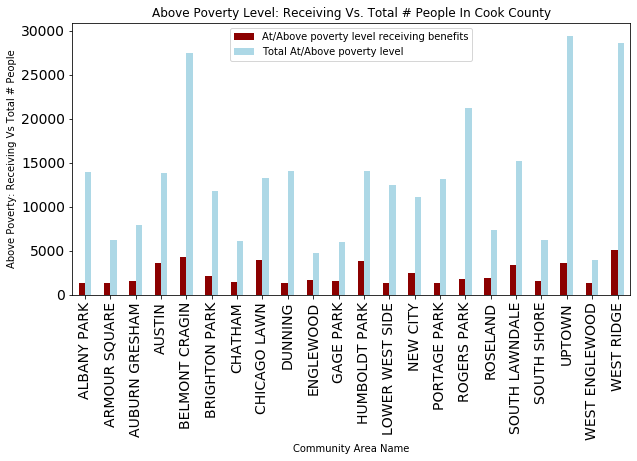

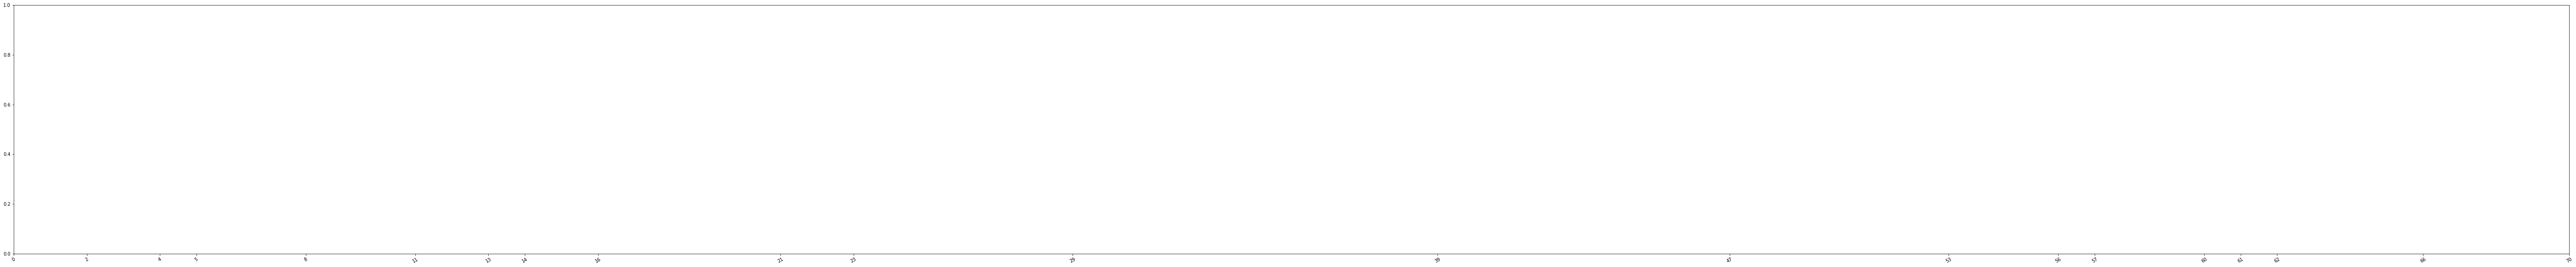

In [40]:
#above pov level over 1200, bar chart

x_axis = "COMMUNITY AREA NAME"
y_axis = ["At/Above poverty level receiving benefits", "Total At/Above poverty level"]

a_greater_1200.plot.bar(x_axis, y_axis, figsize=(10,5),fontsize = 14, align="center", color=('darkred', 'lightblue'))

plt.title("Above Poverty Level: Receiving Vs. Total # People In Cook County")
plt.xlabel("Community Area Name")
plt.ylabel("Above Poverty: Receiving Vs Total # People")

tick_val = a_greater_1200.index
plt.figure(figsize = (100,10))
width = 1
plt.xticks(ticks = tick_val, rotation = 30)

plt.savefig("output_images/abovepov200.png")
plt.show()
plt.tight_layout()

In [ ]:
#Save the figure to Images
plt.savefig("Images/Above_Benefits_Bar.png")

The bar graph compares the above/at poverty level population in neighborhoods of the Greater Chicago area. Each of the neighborhoods have a population more than 1,200 people who receive SNAP benefits that are above the poverty line. The largest discrepancy is Near North Side, which can be assumed is a higher income area due to the high population above/at and the small amount  on  SNAP benefits.

In [41]:
#below pov extract columns
below_pov = combo[["COMMUNITY AREA NAME","Total Below poverty level", "Below poverty level receiving"]]
below_pov

,COMMUNITY AREA NAME,Total Below poverty level,Below poverty level receiving
0,AUSTIN,252.0,174.0
1,WEST RIDGE,353.0,339.0
2,WEST RIDGE,353.0,339.0
3,NEAR WEST SIDE,55.0,0.0
4,NEAR WEST SIDE,55.0,0.0
...,...,...,...
501,WEST ENGLEWOOD,121.0,71.0
502,ASHBURN,230.0,169.0
503,AVONDALE,13.0,0.0
504,MOUNT GREENWOOD,67.0,27.0


The graph looks at the population below the poverty level that is receiving SNAP benefits compared to the total amount of the population below the poverty line in specific neighborhoods throughout the Greater Chicago area. The highest population of below poverty level as well as the most people receiving SNAP benefits is in Uptown. This shows that Uptown is low income and densely populated.

In [42]:
#value counts for below poverty
below_pov["COMMUNITY AREA NAME"].value_counts()

BELMONT CRAGIN     22
SOUTH LAWNDALE     20
WEST RIDGE         18
NEAR NORTH SIDE    17
NEW CITY           16
                   ..
PULLMAN             1
OHARE               1
BEVERLY             1
DOUGLAS             1
MONTCLARE           1
Name: COMMUNITY AREA NAME, Length: 73, dtype: int64

In [43]:
#sum community areas and reset index
group_be_pov = below_pov.groupby(["COMMUNITY AREA NAME"]).sum().reset_index()
group_be_pov

#take out everything under 1200 pop for below pov data
b_greater_1200 = group_be_pov.loc[group_be_pov["Below poverty level receiving"] >= 1200, :]
b_greater_1200

,COMMUNITY AREA NAME,Total Below poverty level,Below poverty level receiving
2,ARMOUR SQUARE,2861.0,1801.0
4,AUBURN GRESHAM,2951.0,1892.0
5,AUSTIN,5009.0,3368.0
8,BELMONT CRAGIN,4486.0,2140.0
11,BRIGHTON PARK,3301.0,1858.0
13,CHATHAM,2193.0,1382.0
14,CHICAGO LAWN,5356.0,3362.0
21,ENGLEWOOD,3263.0,2240.0
29,HUMBOLDT PARK,5736.0,3716.0
39,LOWER WEST SIDE,3318.0,1343.0


# Bar Chart 2

FileNotFoundError: [Errno 2] No such file or directory: 'output_images/belowpov200.png'

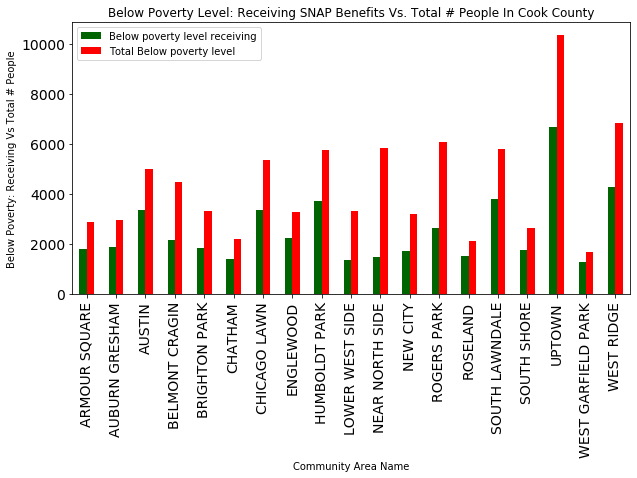

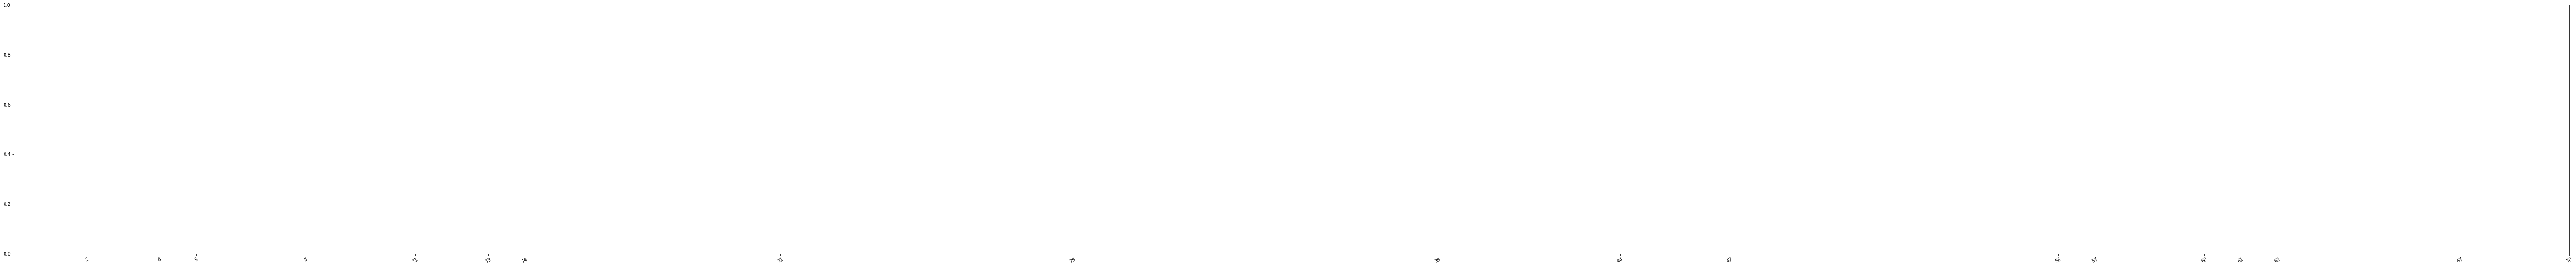

In [44]:
#below pov over 200
x_axis = "COMMUNITY AREA NAME"
y_axis = ["Below poverty level receiving", "Total Below poverty level"]

b_greater_1200.plot.bar(x_axis, y_axis, figsize=(10,5), fontsize = 14, align="center", color=('darkgreen','red'))

plt.title("Below Poverty Level: Receiving SNAP Benefits Vs. Total # People In Cook County")
plt.xlabel("Community Area Name")
plt.ylabel("Below Poverty: Receiving Vs Total # People")

tick_val = b_greater_1200.index
plt.figure(figsize = (100,10))
width = 1
plt.xticks(ticks = tick_val, rotation = 30)
plt.savefig("output_images/belowpov200.png")

plt.show()
plt.tight_layout()

In [ ]:
#Save the figure to Images
plt.savefig("Images/Below_Benefits_Bar.png")

# Heat Map 2

In [45]:
#Configure API key
gmaps.configure(api_key=g_key)

In [46]:
#display grocery dataframe

grocery_file = "clean_grocery.csv"
clean_grocery = pd.read_csv(grocery_file)
clean_grocery
#read the data and the study results for CSV 


,STORE NAME,SQUARE FEET,BUFFER SIZE,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,CENSUS TRACT,LATITUDE,LONGITUDE,LOCATION
0,BOB'S LIQUORS & GROCERIES,10001.0,A,60644,AUSTIN,25,17031252201,41.880296,-87.752494,"(41.8802960895, -87.7524941982)"
1,QUICK STOP FOOD MART,3000.0,B,60645,WEST RIDGE,2,17031020601,42.004750,-87.699423,"(42.0047500731, -87.6994227766)"
2,DOMINICK'S #147/1147,68000.0,A,60607,NEAR WEST SIDE,28,17031841900,41.864521,-87.639304,"(41.8645211937, -87.6393040996)"
3,CERMAK PRODUCE,25000.0,A,60632,WEST ELSDON,62,17031620200,41.797992,-87.723444,"(41.79799187, -87.7234437408)"
4,WHOLE FOODS MARKET,4501.0,B,60657,LAKE VIEW,6,17031062500,41.941566,-87.668860,"(41.9415658578, -87.6688604029)"
...,...,...,...,...,...,...,...,...,...,...
501,WALGREENS #11410,NaN,A,60639,HUMBOLDT PARK,23,17031230400,41.910714,-87.726210,"(41.91071448, -87.72621042)"
502,TIERRA CALIENTE MARKET,3125.0,B,60622,WEST TOWN,24,17031241500,41.907102,-87.667740,"(41.9071018181, -87.6677396553)"
503,QUALITY FOOD ON 71 ST INC,3000.0,B,60629,CHICAGO LAWN,66,17031661000,41.764512,-87.687987,"(41.7645116769, -87.687986655)"
504,JEWEL FOOD STORE #3302,25431.0,A,60609,MCKINLEY PARK,59,17031590500,41.827584,-87.682454,"(41.8275838968, -87.6824544425)"


In [49]:
locations = clean_grocery[["LATITUDE", "LONGITUDE"]].astype(float)

In [50]:
fig = gmaps.figure()
#Plot the heatmap
center_coordinates = (41.7376587, -87.697554)
layout = {'width': '600px', 'height': '400px', 'padding': '1px', 'margin': '0 auto 0 auto'}
fig = gmaps.figure(layout=layout,center=center_coordinates, zoom_level=5)

heat_layer = gmaps.heatmap_layer(locations, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1.5)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='400px', margin='0 auto 0 auto', padding='1px', width='600px'))

In [51]:
#Add grocery store location markers
info_box_template = """
<dl>
<dt>Name</dt><dd>{STORE NAME}</dd>
<dt>Location</dt><dd>{LOCATION}</dd>
<dt>Census Tract</dt><dd>{CENSUS TRACT}</dd>
</dl>
"""
# Store the DataFrame Row
grocery_info = [info_box_template.format(**row) for index, row in clean_grocery.iterrows()]
locations = clean_grocery[["LATITUDE", "LONGITUDE"]]

In [52]:
markers = gmaps.marker_layer(locations, info_box_content = grocery_info)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='400px', margin='0 auto 0 auto', padding='1px', width='600px'))

In [ ]:
#Save the figure to Images
plt.savefig("Images/Gorcery_Location_Map.png")

This Heat Map shows the amount of grocery store locations in Chicago, specifically within Cook County.

## Pie Chart of Race Receiving/Not Receiving SNAP Benefits

In [53]:
#read race CSV

race_file = "race.csv"
race_df = pd.read_csv(race_file)
race_df

,CENSUS TRACT,White receiving,White not receiving,Black receiving,Black not receiving,American Indian receiving,American Indian not receiving,Asian receiving,Asian not receiving,Pacific Islander receiving,Pacific Islander not receiving,Other race receiving,Other race not receiving,Two or more races receiving,Two or more races not receiving,Hispanic/Latino receiving,Hispanic/Latino not receiving
0,17031010100,92,1066,279,724,0,0,0,28,0,0,16,21,46,44,50,165
1,17031010201,273,1106,414,500,0,15,0,51,0,0,77,128,87,37,140,373
2,17031010202,100,325,86,345,0,14,23,46,0,0,23,123,0,17,63,188
3,17031010300,164,1720,166,662,0,0,12,16,0,0,85,75,43,94,62,356
4,17031010400,208,1240,69,254,0,0,0,89,0,0,0,17,0,61,8,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,17031843800,52,132,138,266,0,0,9,19,0,0,0,8,0,0,6,66
1315,17031843900,0,105,463,1253,0,0,10,56,0,0,0,55,12,24,0,80
1316,17031980000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1317,17031980100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
#receiving variables sum
white_receiving= race_df["White receiving"].sum()
black_receiving = race_df["Black receiving"].sum()
hispanic_latino_receiving = race_df["Hispanic/Latino receiving"].sum()
other_receiving = race_df[["American Indian receiving", "Pacific Islander receiving", "Other race receiving "]].sum()
mixed_race_receiving = race_df["Two or more races receiving "].sum()
asian_receiving = race_df["Asian receiving"].sum()
receiving_df= pd.DataFrame(race_df, columns = ['White receiving','Black receiving', 'Hispanic/Latino_receiving', 'Asian_receiving', 'Mixed_race_receiving','Other_receiving'])
receiving_df

,White receiving,Black receiving,Hispanic/Latino_receiving,Asian_receiving,Mixed_race_receiving,Other_receiving
0,92,279,NaN,NaN,NaN,NaN
1,273,414,NaN,NaN,NaN,NaN
2,100,86,NaN,NaN,NaN,NaN
3,164,166,NaN,NaN,NaN,NaN
4,208,69,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1314,52,138,NaN,NaN,NaN,NaN
1315,0,463,NaN,NaN,NaN,NaN
1316,0,0,NaN,NaN,NaN,NaN
1317,0,0,NaN,NaN,NaN,NaN


In [55]:
white_not_receiving= race_df["White not receiving"].sum()
black_not_receiving = race_df["Black not receiving"].sum()
hispanic_latino_not_receiving = race_df["Hispanic/Latino not receiving"].sum()
other_not_receiving = race_df[["American Indian not receiving", "Pacific Islander not receiving", "Other race not receiving"]].sum()
mixed_race_not_receiving = race_df["Two or more races not receiving"].sum()
asian_not_receiving = race_df["Asian not receiving"].sum()
not_receiving_df = pd.DataFrame(race_df, columns = ['White not receiving','Black not receiving', 'Hispanic/Latino not receiving', 'Asian_not_receiving', 'Mixed_race_not_receiving', 'Other_not_receiving'])
not_receiving_df

,White not receiving,Black not receiving,Hispanic/Latino not receiving,Asian_not_receiving,Mixed_race_not_receiving,Other_not_receiving
0,1066,724,165,NaN,NaN,NaN
1,1106,500,373,NaN,NaN,NaN
2,325,345,188,NaN,NaN,NaN
3,1720,662,356,NaN,NaN,NaN
4,1240,254,85,NaN,NaN,NaN
...,...,...,...,...,...,...
1314,132,266,66,NaN,NaN,NaN
1315,105,1253,80,NaN,NaN,NaN
1316,0,0,0,NaN,NaN,NaN
1317,0,0,0,NaN,NaN,NaN


In [31]:
# Generate a pie plot
pie_plot = white_receiving, black_receiving, hispanic_latino_receiving, asian_receiving, mixed_race_receiving
labels = 'White', 'Black', 'Hispanic/Latino', 'Asian', 'Mixed'
fig1, ax1 = plt.subplots()
ax1.pie(pie_plot, labels=labels, autopct='%1.1f%%', shadow=True)
# plt.title('Race Receiving SNAP Benefits')
# plt.axis('equal')
ax1.set(aspect="equal", title='Races Receiving SNAP Benefits')
plt.show()
ax1.axis('equal')  
plt.show()

NameError: name 'white_receiving' is not defined

In [ ]:
#Save the figure to Images
plt.savefig("Benefits_Pie.png")

The majority of the race receiving SNAP Benefits identified as black with the minority identifying as mixed (two or more races receiving benefits).

In [27]:
pie_plot = white_not_receiving, black_not_receiving, hispanic_latino_not_receiving, asian_not_receiving, mixed_race_not_receiving
labels = 'White', 'Black', 'Hispanic/Latino', 'Asian', 'Mixed'

fig1, ax1 = plt.subplots()
ax1.pie(pie_plot, labels=labels, autopct='%1.1f%%',
        shadow=True)
# plt.title('Race NOT Receiving SNAP Benefits')
# plt.axis('equal')
ax1.set(aspect="equal", title='Races NOT Receiving SNAP Benefits')
plt.show()
ax1.axis('equal')
plt.show()

NameError: name 'white_not_receiving' is not defined

In [28]:
#Save the figure to Images
plt.savefig("Images/No_Benefits_Pie.png")

<Figure size 432x288 with 0 Axes>

The majority of the race that is not receiving SNAP benefits identified as white with the minority identifying as mixed (two or more races not receiving snap benefits)

In [18]:
#Import data sets for regressions
census_data_path = os.path.join("census.csv")
census_data = pd.read_csv(census_data_path)
                          
access_data_path = os.path.join("census_access.csv")
access_data = pd.read_csv(access_data_path)

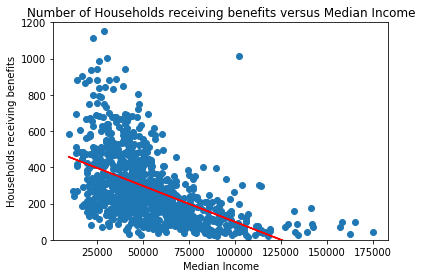

In [32]:
#Define Variables
receiving = census_data["HH receiving benefits"]
income = census_data ["Median Income"]

#Calculate R and R-squared
r0=stats.pearsonr(income,receiving)
rsq0 = r0[1]

#Run Linear Regression
(slope0, intercept0, rvalue0, pvalue0, stderr0) = stats.linregress(income, receiving)
regress_values0 = income * slope0 + intercept0
line_eq0 = "y = " + str(slope0) + "x + " + str(intercept0)

#Linear Regression 
plt.scatter(income,receiving)
plt.plot(income,regress_values0,"r-")

#Format the Figure
plt.xlabel("Median Income")
plt.ylabel("Households receiving benefits")
plt.title("Number of Households receiving benefits versus Median Income")

plt.ylim(0, 1200)

#Save the figure to Images
plt.savefig("Images/Benefits_Income_regression.png")

In [11]:
line_eq0

'y = -0.003969207414903632x + 496.6396805923066'

The scatterplot reveals a relationship that would probably be better described using nonlinear regression. It appears that there are large differences in the number of households receiving benefits in the lower income range, with a concentration at lower levels of households receiving. Still, the linear regression equation accurately describes the negative relationship: For every additional $1000 of income, we predict four fewer households in that census tract receive food benefits.

Additionally, the y-intercept shows that, under this model, if a census tract had a median income of $0, we would predict the mean number of households receiving benefits to be almost 500. Because the relationship does not appear linear, we might not trust this number exactly, but it does tell us that while low income means a higher than average numbe of households requiring benefits--that the benefits to do not meet need.

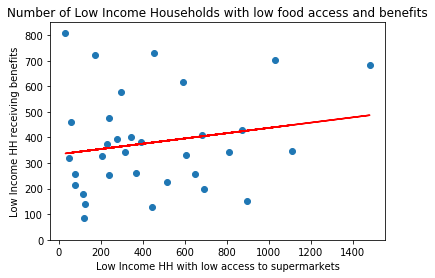

In [33]:
low_receiving = access_data["HH receiving benefits"]
low_low = access_data ["Number of low-income people with low access to a supermarket or large grocery store"]

r1=stats.pearsonr(low_low,low_receiving)
rsq1 = r1[1]

(slope1, intercept1, rvalue1, pvalue1, stderr1) = stats.linregress(low_low, low_receiving)
regress_values1 = low_low * slope1 + intercept1
line_eq1 = "y = " + str(slope1) + "x + " + str(intercept1)


plt.scatter(low_low,low_receiving)
plt.plot(low_low,regress_values1,"r-")

#Format the Figure
plt.xlabel("Low Income HH with low access to supermarkets")
plt.ylabel("Low Income HH receiving benefits")
plt.title("Number of Low Income Households with low food access and benefits")

plt.ylim(0, 850)

#Save the figure to Images
plt.savefig("Images/Low_Income_Access.png")




In [23]:
line_eq1

'y = 0.10313997973947772x + 334.23221379135657'

Again, the relationship between the data does not appear to fit a linear relationship perfectly. However, the regression equation does tell us that there is a slight positive relationship between low income households with low access and the number receiving benefits. For every 100 Households with low access, we expect to see 10 additional househodls receiving government food benefits. This is a concerning trend because it means that benefits are not meeting need and do not address acquiring the food--whether or not it is bought using benefits. 

